In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [3]:
train = pd.read_csv(r'C:\Users\troyd\Downloads\Santander Customer Satisfaction - TRAIN.csv', index_col=0)
test = pd.read_csv(r'C:\Users\troyd\Downloads\test.csv\test.csv', index_col=0)

In [4]:
# Cleaning up the data
train = train.replace(-999999,2) # replacing with average from XGBoost submission

# counting zeroes from feature selection
X = train.iloc[:,:-1]
y = train.iloc[:, -1]


X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

# these are notes based on the discussion board available on the kaggle competition
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

#Check for nan's
print('Number of nan in var38mc', train['var38mc'].isnull().sum())
print('Number of nan in logvar38',train['logvar38'].isnull().sum())




Number of nan in var38mc 0
Number of nan in logvar38 0


In [36]:
# Check for nan's
train.isnull().sum()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
var38                      0
TARGET                     0
n0                         0
var38mc                    0
logvar38                   0
Length: 373, dtype: int64

array([[<AxesSubplot:title={'center':'TARGET'}>]], dtype=object)

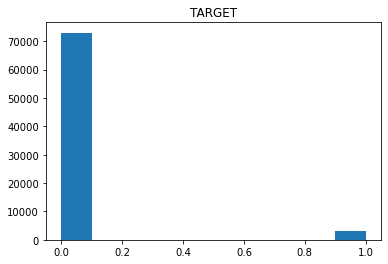

In [5]:
#Exploratory Data Analysis - Histogram of Target example code

train.hist(column='TARGET',grid=False)

In [37]:
# Basic stats

train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,n0,logvar38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569,335.426888,9.199169
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945,17.836658,4.569727
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000,220.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000,325.000000,10.602061
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000,340.000000,11.221319
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000,348.000000,11.684828
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000,361.000000,16.908131


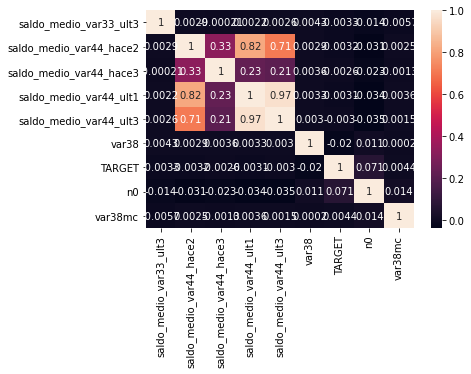

In [22]:
# EDA - Correlation Matrix
import seaborn 
import matplotlib.pyplot as plt

corrMatrix = train[train.columns[-10:-1]].corr()
seaborn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from matplotlib import pyplot

clf = XGBClassifier()
clf = clf.fit(X, y)

# original code
#clf = tree.DecisionTreeClassifier(max_depth = 5)
#clf = clf.fit(X, y)

plot_tree(clf) 

In [6]:
pred=pd.DataFrame(clf.predict(X),columns=["Prediction"])

pred.head()
pred.to_csv(r'C:\Users\troyd\Documents\ASU Graduate School\pred_1.csv')

In [7]:
pred_Probability =pd.DataFrame(clf.predict_proba(X))

pred_Probability.head()

,0,1
0,0.957955,0.042045
1,0.985749,0.014251
2,0.994307,0.005693
3,0.966537,0.033463
4,0.985749,0.014251


In [8]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y,pred, zero_division = True))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     73012
           1       0.73      0.01      0.02      3008

    accuracy                           0.96     76020
   macro avg       0.84      0.51      0.50     76020
weighted avg       0.95      0.96      0.94     76020



In [9]:
X = test
test = test.replace(-999999,2)

X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

test['var38mc'] = np.isclose(test.var38, 117310.979016)
test['logvar38'] = test.loc[~test['var38mc'], 'var38'].map(np.log)
test.loc[test['var38mc'], 'logvar38'] = 0

pred=pd.DataFrame(clf.predict(X),columns=["TARGET"])

pred["ID"] = X.index
pred.head()
pred.to_csv(r'C:\Users\troyd\Documents\ASU Graduate School\pred_1.csv', index = False)

In [10]:
# test 1 - 0.500
# test 2 - 0.5055 # increase depth to 10
# test 3 - 0.50146 # simplifying data
# test 4 - 0.50409 # Using XGBoost